## 0. Python & Pandas Data Types
Explore different data types and fix common issues.

In [ ]:
# Exercise 0.1: Identify types
a = [1, 2, 3]
b = {'key': 10}
c = (4.5, True)
d = set([1, 2, 2])
e = None



In [ ]:
# Exercise 0.2: Create Series from each and inspect dtype
import pandas as pd




In [ ]:
# Exercise 0.3: Fix the conversion error
df = pd.DataFrame({'col': ['1', '2', 'three', '4']})
# Convert to integer, coerce errors to NaN
# SOLUTION: Fix this line
df['col'] = pd.to_numeric(df['col'])


## 1. Load & Clean Dataset
Read the dataset, check for missing values, and standardize column names.

In [ ]:
# Exercise 1.1: Load Superstore.csv dataset and display info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1000 non-null   object 
 1   Order Date    1000 non-null   object 
 2   Category      1000 non-null   object 
 3   Region        1000 non-null   object 
 4   Sales         1000 non-null   float64
 5   Profit        1000 non-null   float64
 6   Quantity      1000 non-null   int64  
 7   Customer ID   1000 non-null   object 
 8   Sub-Category  1000 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


In [ ]:
# Exercise 1.2: Clean column names to snake_case 
def clean_columns(columns):
    pass
    
# Apply this to df.columns


In [ ]:
# Exercise 1.3: Check and report missing values


## 2. Pivot and Unpivot
Practice reshaping data for reporting.

In [ ]:
# Exercise 2.1: Create pivot table of Sales by Region and Category (fix)
GROUPER_COLUMN = 'Category'
#Hint: https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html
pivot = pd.pivot_table(df, values='Sales', index='Region')
print(pivot)

Sub-Category  Accessories   Binders  Bookcases    Chairs   Copiers    Labels  \
Region                                                                         
Central          14120.03  21025.75   15998.72  14384.95  15724.78  13969.72   
East             12518.88  14983.99   13534.37  19055.36  14072.53  18326.07   
South            15206.81   8760.69   11620.71  11101.35  11857.10  13082.82   
West             16062.16  10443.10   14091.92  16974.70  12721.30  13725.71   

Sub-Category     Paper    Phones    Tables  
Region                                      
Central       13945.86  13130.46  17927.68  
East          20150.27  15087.07  12760.83  
South         13759.98  13722.11  17915.41  
West          16214.27  12277.89  15943.02  


In [113]:
# Exercise 2.2: Unpivot the table using pd.melt
# SOLUTION: Melt the pivoted frame back

melted = pd.melt(pivot.reset_index(), id_vars='Region')
melted.head()

,Region,Sub-Category,value
0,Central,Accessories,14120.03
1,East,Accessories,12518.88
2,South,Accessories,15206.81
3,West,Accessories,16062.16
4,Central,Binders,21025.75


In [114]:
# Exercise 2.3: Debug this code
# This line raises an error. Fix it.
# pivot = df.pivot(index='Category', columns='Region', values='Sales', aggfunc='sum')


## 3. Grouping, Aggregation and Merging
Group, summarize, and merge statistics.

In [115]:
# Exercise 3.1: Group by Category, aggregate Sales, Profit, Quantity
# SOLUTION: Use .groupby and .agg

grouped = df.groupby(GROUPER_COLUMN).agg({'Sales': 'sum', 'Profit': 'mean', 'Quantity': 'sum'})
print(grouped)

                 Sales     Profit  Quantity
Sub-Category                               
Accessories   57907.88  52.783423       552
Binders       55213.53  52.703942       541
Bookcases     55245.72  25.104259       550
Chairs        61516.36  62.951379       629
Copiers       54375.71  57.612353       500
Labels        59104.32  47.032828       512
Paper         64070.38  63.984878       602
Phones        54217.53  43.033113       537
Tables        64546.94  37.664122       605


In [ ]:
# Exercise 3.2: What percenatce of all Technology orders is order with ID CA-1000 (in terms of quantity)
# Hint: Use .merge and and results of 3.1


,Order ID,Order Date,Category,Region,Sales,Profit,Quantity,Customer ID,Sub-Category,Sales_cat,Profit_cat,Quantity_cat
0,CA-1000,2020-01-01,Technology,Central,650.22,-112.56,6,CUST-1127,Accessories,57907.88,52.783423,552
1,CA-1001,2020-01-02,Furniture,Central,296.81,227.87,5,CUST-1313,Bookcases,55245.72,25.104259,550
2,CA-1002,2020-01-03,Technology,Central,652.31,-86.41,5,CUST-1331,Accessories,57907.88,52.783423,552
3,CA-1003,2020-01-04,Technology,Central,562.99,218.52,1,CUST-1149,Copiers,54375.71,57.612353,500
4,CA-1004,2020-01-05,Furniture,South,790.85,-60.36,5,CUST-1453,Bookcases,55245.72,25.104259,550


In [ ]:
# Exercise 3.3: Write a function that takes a dataframe and returns group statistics by a column (this is argument) - apply this function to sales


In [ ]:
# Exercise 3.4: Create a histogram for results from 3.2

## 4. Outlier Detection
Use z-scores and visualizations to detect outliers.

In [ ]:
# Exercise 4.1: Add z-score column for Profit and flag |z| > 3
# Hint: Use scipy.stats.zscore


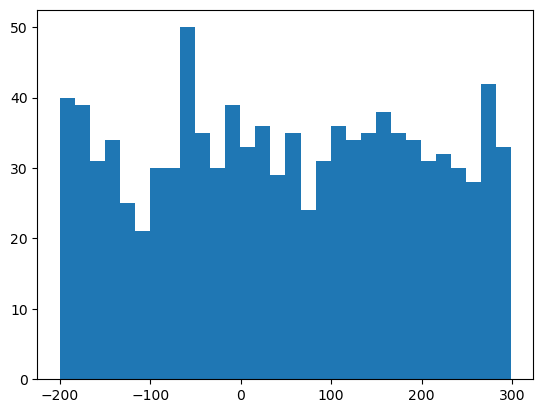

In [ ]:
# Exercise 4.2: Plot histogram with outliers
# SOLUTION: Use matplotlib to color outliers differently


In [ ]:
# Exercise 4.3: Debug this broken outlier logic
df['Profit_z'] = (df['Profit'] - df .mean()) / df .std()  # Fix it


In [ ]:
# Exercise 4.4: Calculate z-score for 'Profit' within each Category and Region group
# Hint: .transform and lambda function


,Order ID,Order Date,Category,Region,Sales,Profit,Quantity,Customer ID,Sub-Category,Sales_cat,Profit_cat,Quantity_cat,profit_z,is_outlier,Profit_z,profit_per_qty,profit_group_z,group_outlier
13,CA-1013,2020-01-14,Technology,Central,940.37,269.15,1,CUST-1355,Accessories,57907.88,52.783423,552,1.517968,False,1.517208,269.15,3.543571,True
28,CA-1028,2020-01-29,Technology,South,770.35,288.40,1,CUST-1399,Accessories,57907.88,52.783423,552,1.650851,False,1.650026,288.40,3.596157,True
61,CA-1061,2020-03-02,Furniture,South,79.58,226.13,1,CUST-1854,Bookcases,55245.72,25.104259,550,1.220998,False,1.220387,226.13,4.086770,True
112,CA-1112,2020-04-22,Furniture,West,360.14,-129.99,1,CUST-1053,Chairs,61516.36,62.951379,629,-1.237319,False,-1.236700,-129.99,-3.078016,True


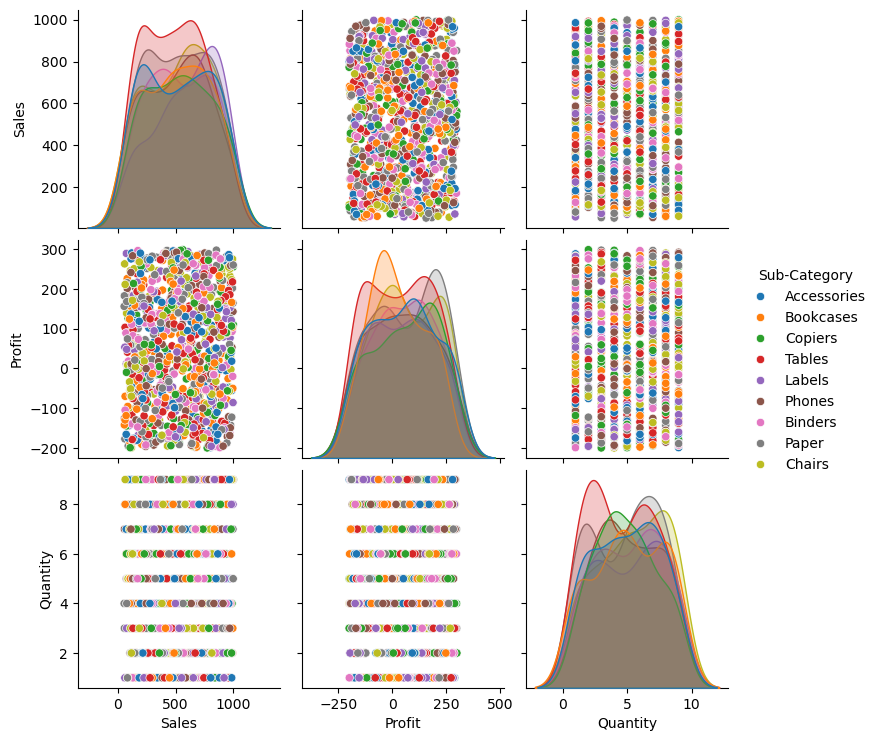

In [ ]:
# Exercise 4.5: Use seaborn to create a pairplot of numeric variables

## 5. Time Series Resampling
Resample to monthly level and visualize.

In [ ]:
# Exercise 5.1: Convert 'Order Date' to datetime and set as index


In [ ]:
# Exercise 5.2: Resample sales monthly and fill missing
# Hint: Use resample

               Sales   Profit  Quantity   Sales_cat   Profit_cat  \
Order Date                                                         
2020-01-31  16835.03  2039.88       146  1805371.67  1496.819763   
2020-02-29  15841.57  1230.43       161  1652889.81  1367.495090   
2020-03-31  16233.95  2663.16       129  1841901.62  1626.297107   
2020-04-30  12439.41   745.67       158  1769191.70  1429.596940   
2020-05-31  16227.18   624.00       152  1798109.54  1512.889256   

            Quantity_cat  profit_z  is_outlier  Profit_z  profit_per_qty  \
Order Date                                                                 
2020-01-31         17059  3.541706           0  3.539935      959.013563   
2020-02-29         15658 -1.365993           0 -1.365310      462.744032   
2020-03-31         17389  7.844244           0  7.840321     1181.823667   
2020-04-30         17106 -5.052310           0 -5.049783      529.555603   
2020-05-31         17309 -6.232196           0 -6.229079      149.2

/tmp/ipykernel_171537/1053747117.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample('M', on='Order Date').sum(numeric_only=True)


<Axes: title={'center': 'Monthly Sales'}, xlabel='Order Date'>

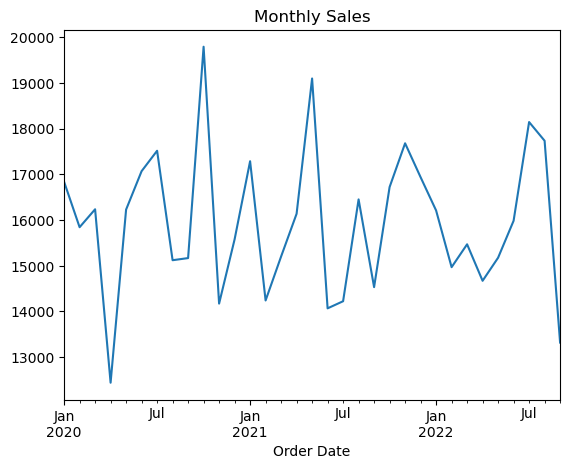

In [ ]:
# Exercise 5.3: Plot monthly sales trend

In [ ]:
# Exercise 5.4: Detect monthly outliers in resampled sales using z-score (sigma 2)



/tmp/ipykernel_171537/3731208062.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()


,Sales,Z-Score,Outlier
Order Date,,,
2020-01-31,16835.03,0.551406,False
2020-02-29,15841.57,-0.064359,False
2020-03-31,16233.95,0.178845,False
2020-04-30,12439.41,-2.173080,True
2020-05-31,16227.18,0.174649,False


In [ ]:
# Exercise 5.5: Plot Time series with outleirs

## 6. Feature Engineering
Create new useful variables for modeling.

In [ ]:
# Exercise 6.1: Add log_sales and profit_per_unit
# Hint: For log features use numpy (log1p) 


In [ ]:
# Exercise 6.2: Create dummies for Region (like one-hot-encoding)
# Hint: There is a function that does this


In [ ]:
# Exercise 6.3: Automate feature engineering write fuction and use(ratio fretures, unit features, daily rate features (only for monthly))


In [ ]:
import numpy as np

# Exercise 6.4: Add more features like sales_to_profit ratio, squared quantity, and log of quantity


## 7. Linear Modeling with statsmodels
Fit OLS model and evaluate.

In [ ]:
# Exercise 7.1: Predict profit from sales and quantity
import statsmodels.api as sm
# SOLUTION: Fit and print model

X = sm.add_constant(df[['Sales', 'Quantity']])
y = df['Profit']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1164
Date:                Mon, 16 Jun 2025   Prob (F-statistic):              0.890
Time:                        09:42:04   Log-Likelihood:                -6394.6
No. Observations:                1000   AIC:                         1.280e+04
Df Residuals:                     997   BIC:                         1.281e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.8260     13.411      3.492      0.0

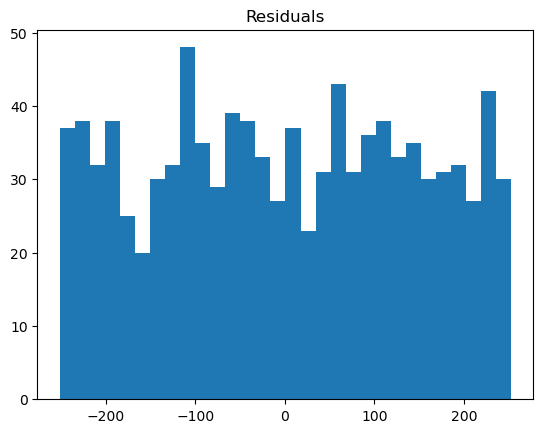

In [ ]:
# Exercise 7.2: Plot residuals

In [ ]:
# Exercise 7.3: Fit a separate linear model per Category (or subcategory) to predict Profit
# Hint: use for loop to interate though categories 


Category: Accessories, R²: 0.144
Category: Bookcases, R²: 0.025
Category: Copiers, R²: 0.023
Category: Tables, R²: 0.147
Category: Labels, R²: 0.005
Category: Phones, R²: 0.291
Category: Binders, R²: 0.001
Category: Paper, R²: 0.024
Category: Chairs, R²: 0.182


# 8. Additional exercises

In [ ]:
# Exercise: Use glob to list all Excel files in a directory
# Hint: Function glob in glob package



['Superstore.csv', 'student_exam_mnar.csv', 'student_exam_mnar_final.csv', 'Superstore_Modified.csv']


In [ ]:
# Exercise (Optional Advanced): Use ipywidgets to create a dropdown to filter by Region, on selection create pairplot per region
# Hint: Use ipywidgets (dropdown and interact)
import ipywidgets as widgets


interactive(children=(Dropdown(description='Region:', options=('Central', 'South', 'East', 'West'), value='Cen…